In [9]:
import sys
sys.path.append("/Users/ajaybati/Documents/mimic/mimic/FastSAM")
from fastsam import FastSAM, FastSAMPrompt 
from PIL import Image

In [10]:
import sys
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

In [11]:
model = FastSAM("/Users/ajaybati/Documents/mimic/mimic/FastSAM-x.pt")

In [12]:
# input = Image.open('/Users/ajaybati/Desktop/ss/Screenshot 2024-05-22 at 8.42.35 PM.png')
input = Image.open('/Users/ajaybati/Downloads/bruh.jpeg')
input = input.convert("RGB")
everything_results = model(
    input,
    device='cpu',
    retina_masks=True,
    imgsz=1024,
    conf=0.4,
    iou=0.9    
    )


0: 576x1024 37 objects, 903.2ms
Speed: 2.2ms preprocess, 903.2ms inference, 10.9ms postprocess per image at shape (1, 3, 1024, 1024)


In [13]:
all_masks = everything_results[0].masks.data.clone().detach()
all_areas = [torch.sum(x).item() for x in all_masks]

In [14]:
all_masks = everything_results[0].masks.data.clone()
all_areas = [torch.sum(x).item() for x in all_masks]
bad_indices = set()
for i in range(len(all_masks)):
    curr_area = all_areas[i]
    for j in range(i+1, len(all_masks)):
        check_area = all_areas[j]
        intersection = all_masks[i] * all_masks[j]
        bigger = i
        minarea = check_area
        if check_area > curr_area:
            bigger = j
            minarea = curr_area
        proportion = torch.sum(intersection)/minarea
        if proportion > 0.7:
            # bad_indices.add(j)
            all_masks[bigger] -= intersection
# keep_mask = torch.ones(all_masks.size(0), dtype=torch.bool)
# keep_mask[list(bad_indices)] = False
# everything_results[0].masks.data = all_masks

    # if x[420,1050] == 1:
    # plt.imshow(x)
    # plt.show()

In [27]:
bad_indices

{0, 1, 2, 4, 5, 7, 10, 13}

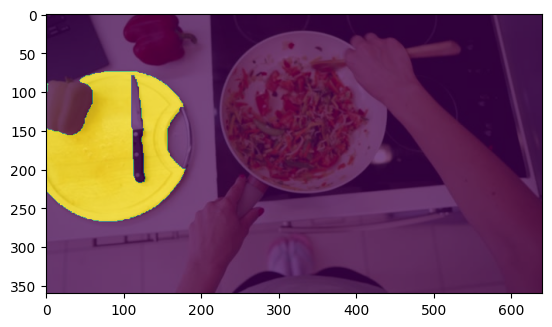

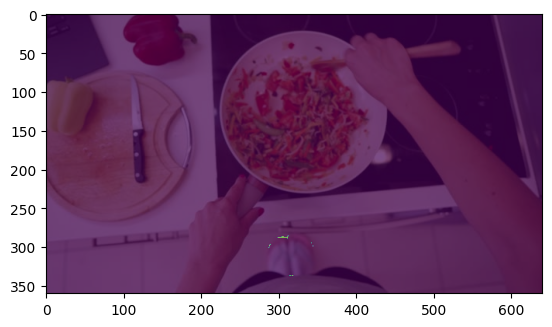

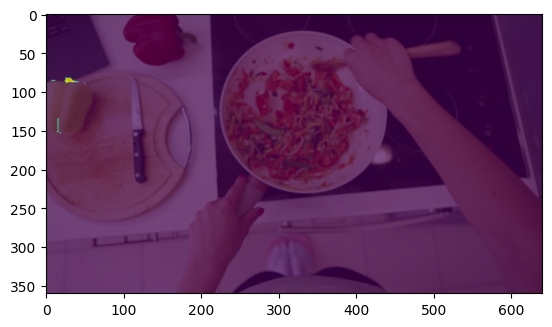

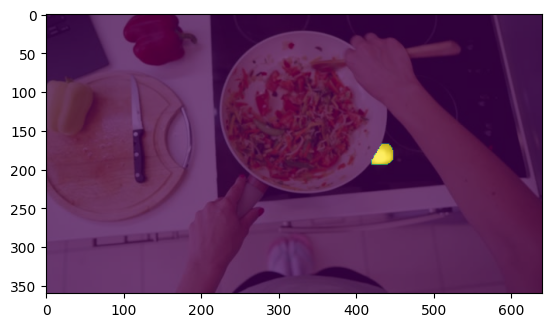

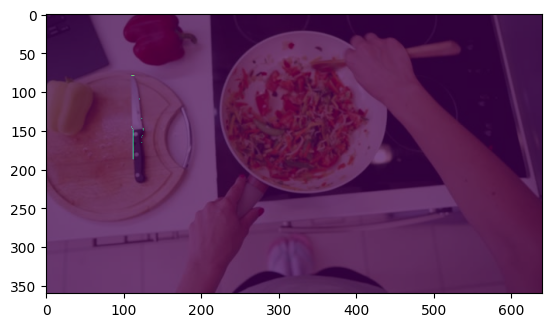

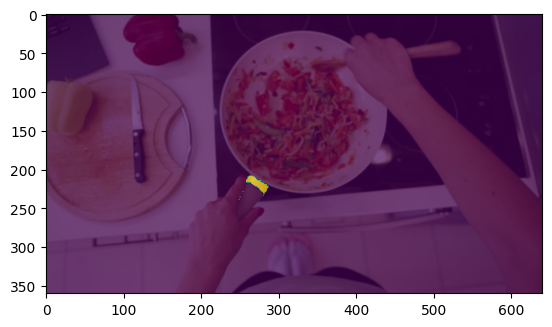

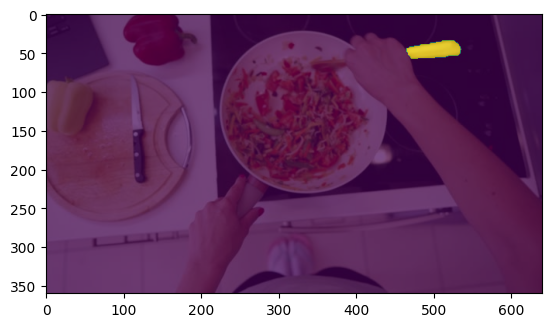

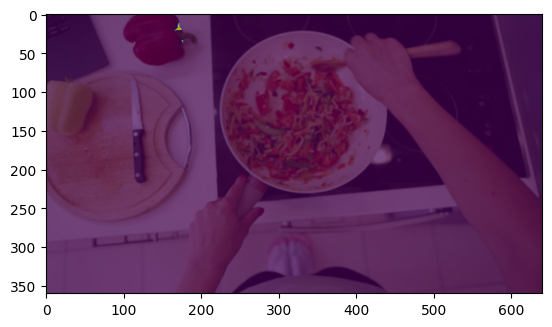

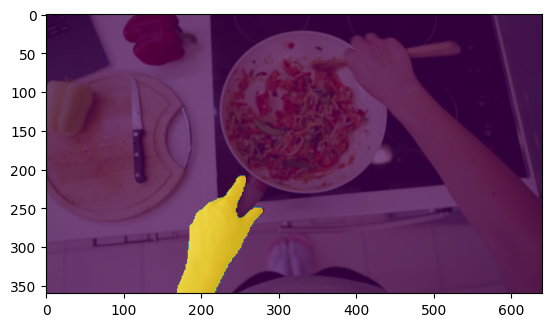

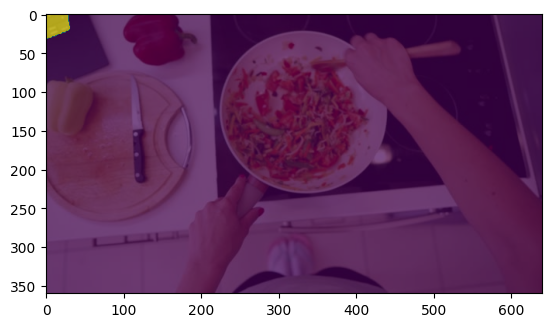

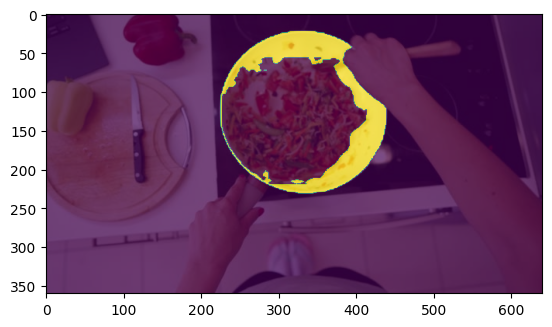

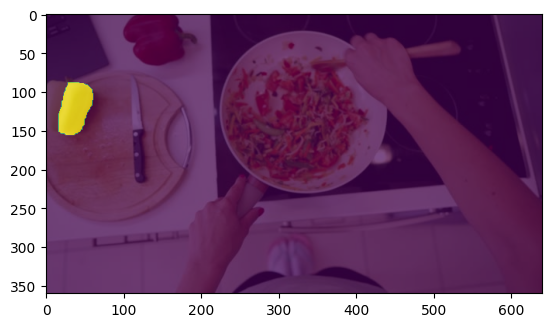

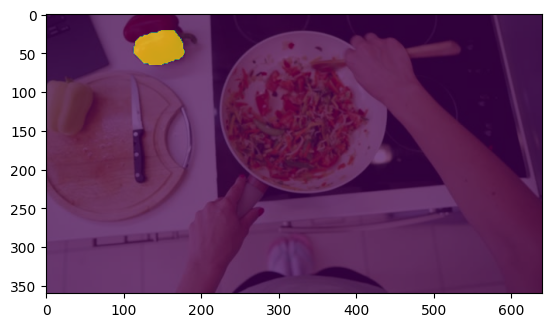

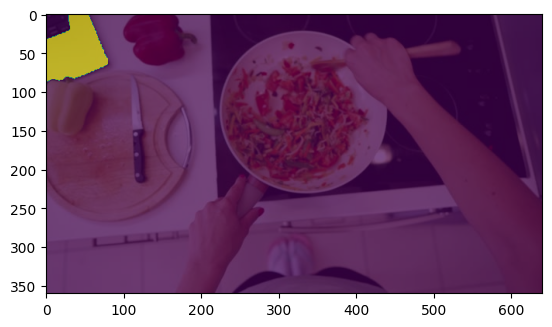

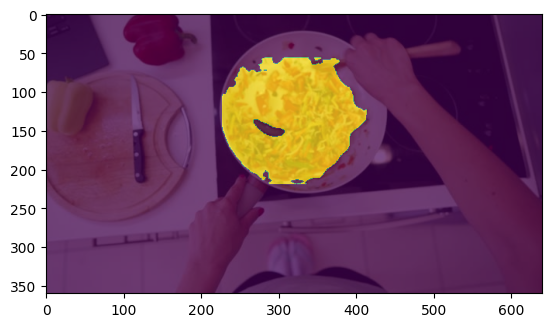

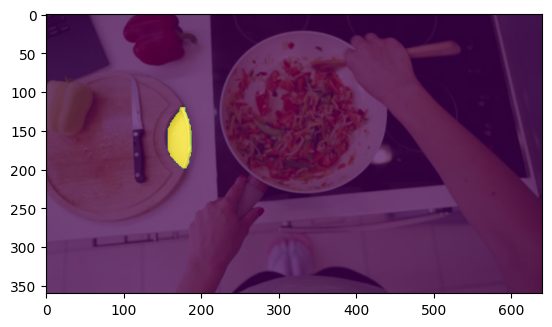

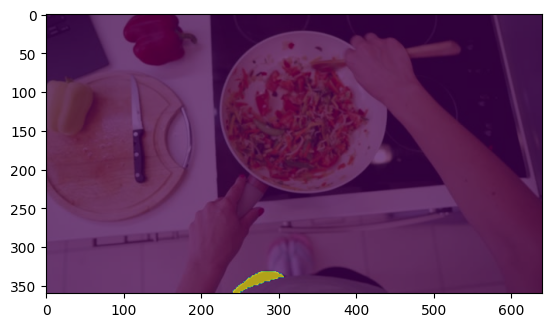

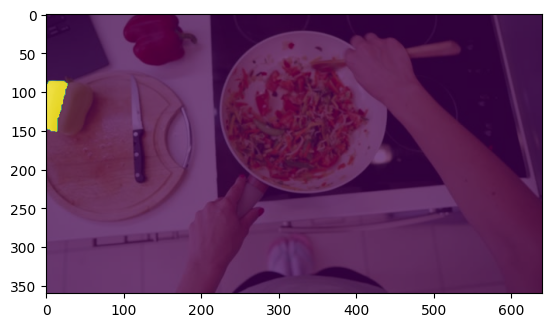

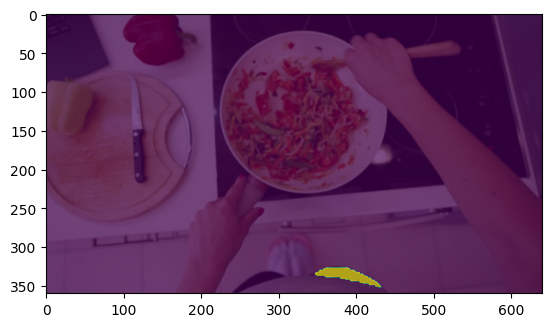

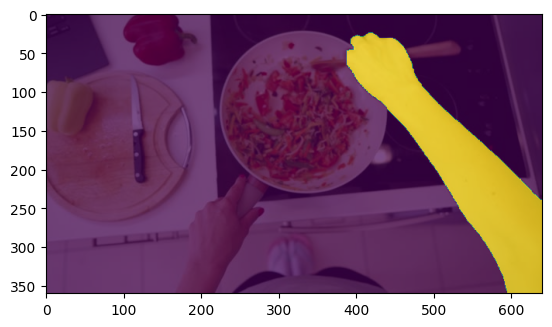

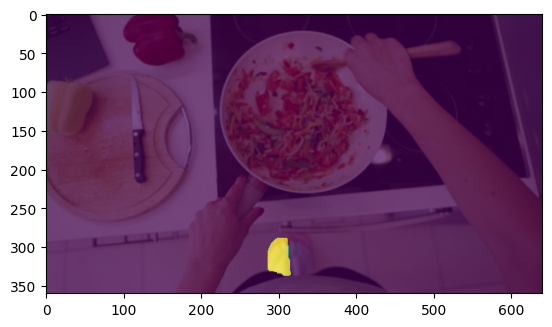

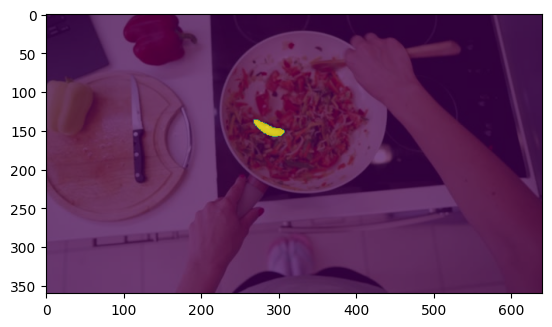

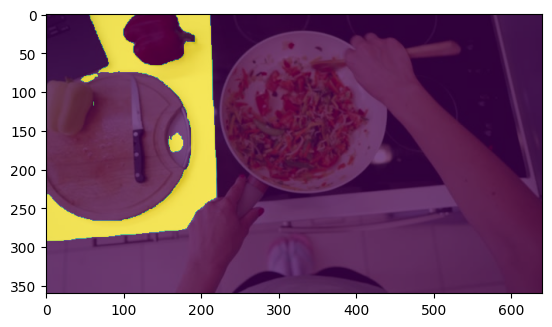

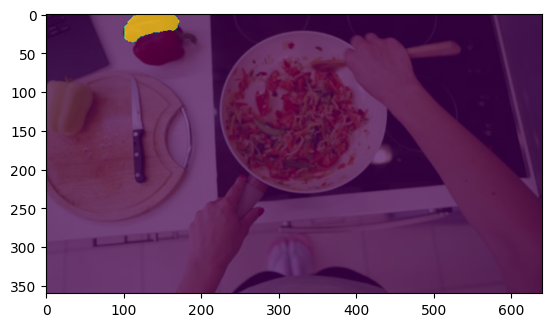

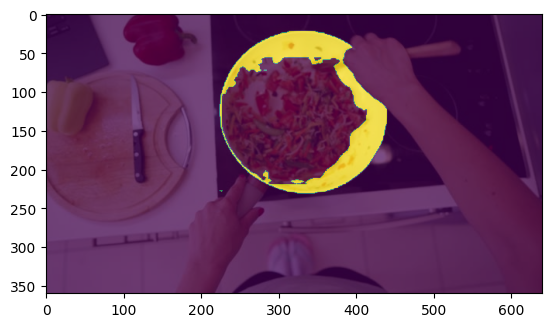

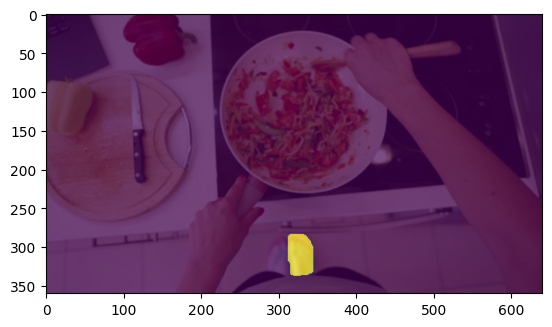

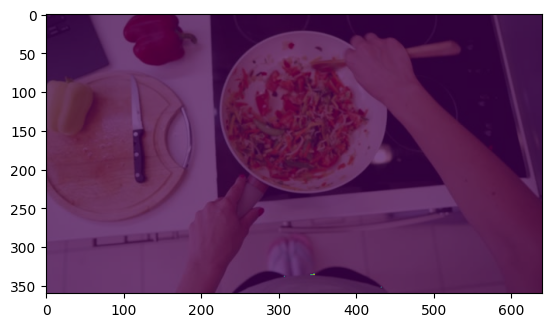

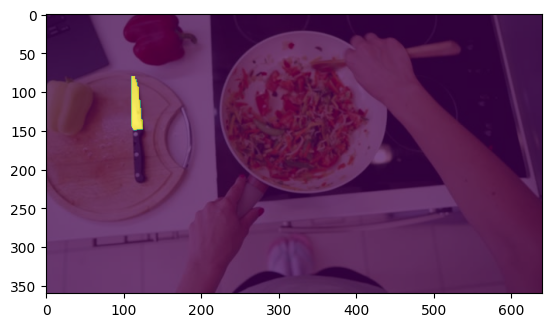

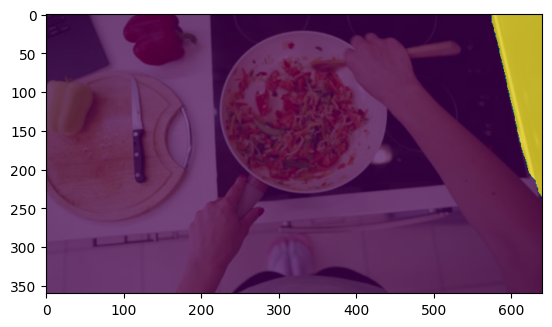

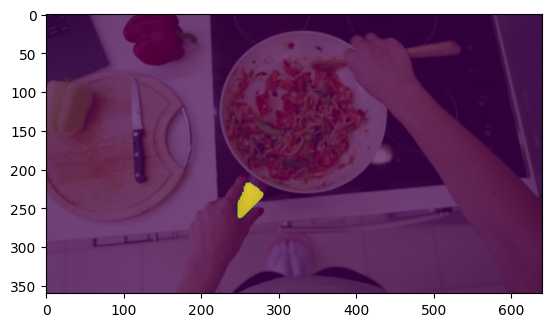

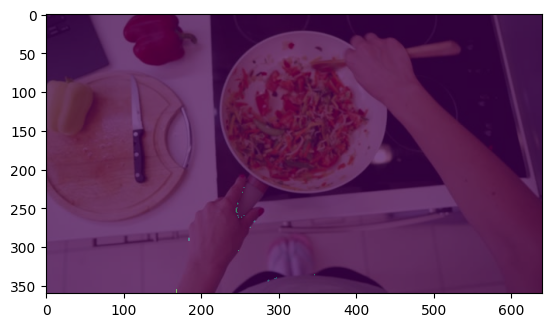

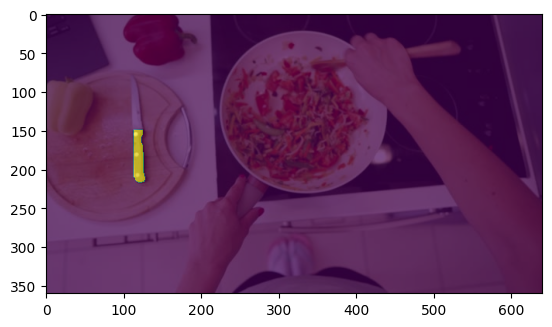

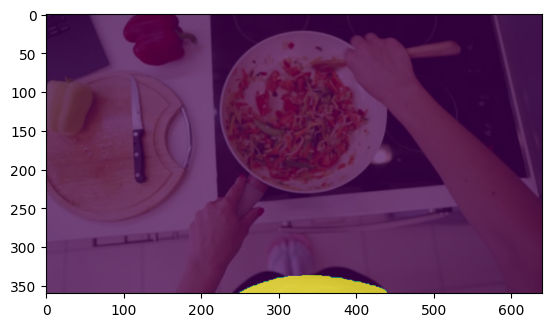

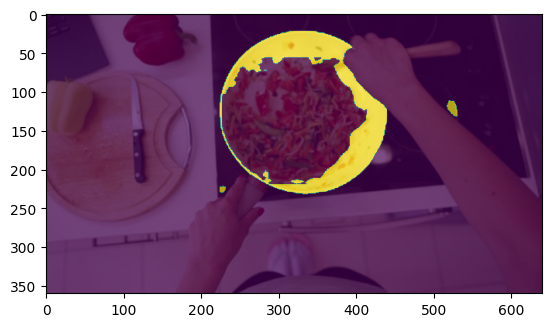

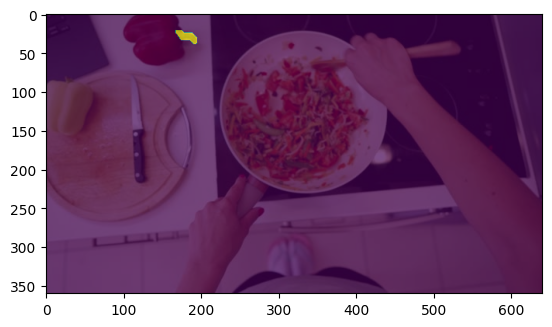

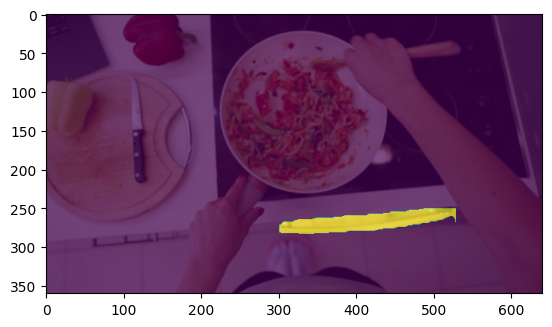

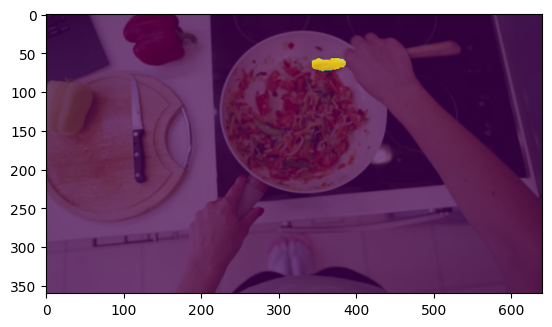

In [18]:
for x in all_masks: #everything_results[0].masks.data
    plt.imshow(x)
    plt.imshow(input, alpha=0.3)
    plt.show()

In [75]:
def getPointPromptAnn(points):
    prompt_process = FastSAMPrompt(input, everything_results, device='cpu')
    ann = prompt_process.point_prompt(
            points=points, pointlabel=[1]*len(points)
        )
    return ann

In [76]:
annotation = getPointPromptAnn([[10,10]])

In [77]:
def convertImageGivenAnnotation(annotation):
    msak_sum = 1
    color = np.ones((msak_sum, 1, 1, 3)) * np.array([255,0,0])
    visual = color
    mask_image = np.expand_dims(annotation, -1) * visual
    mask_image = mask_image.squeeze().astype(int)
    end_result = 0.4*mask_image + 0.6*np.asarray(input)
    end_result = end_result.astype(np.uint8)
    return end_result

In [78]:
end_result = convertImageGivenAnnotation(annotation)

In [79]:
type(end_result)

numpy.ndarray

In [80]:
end_result.shape

(1178, 1926, 3)

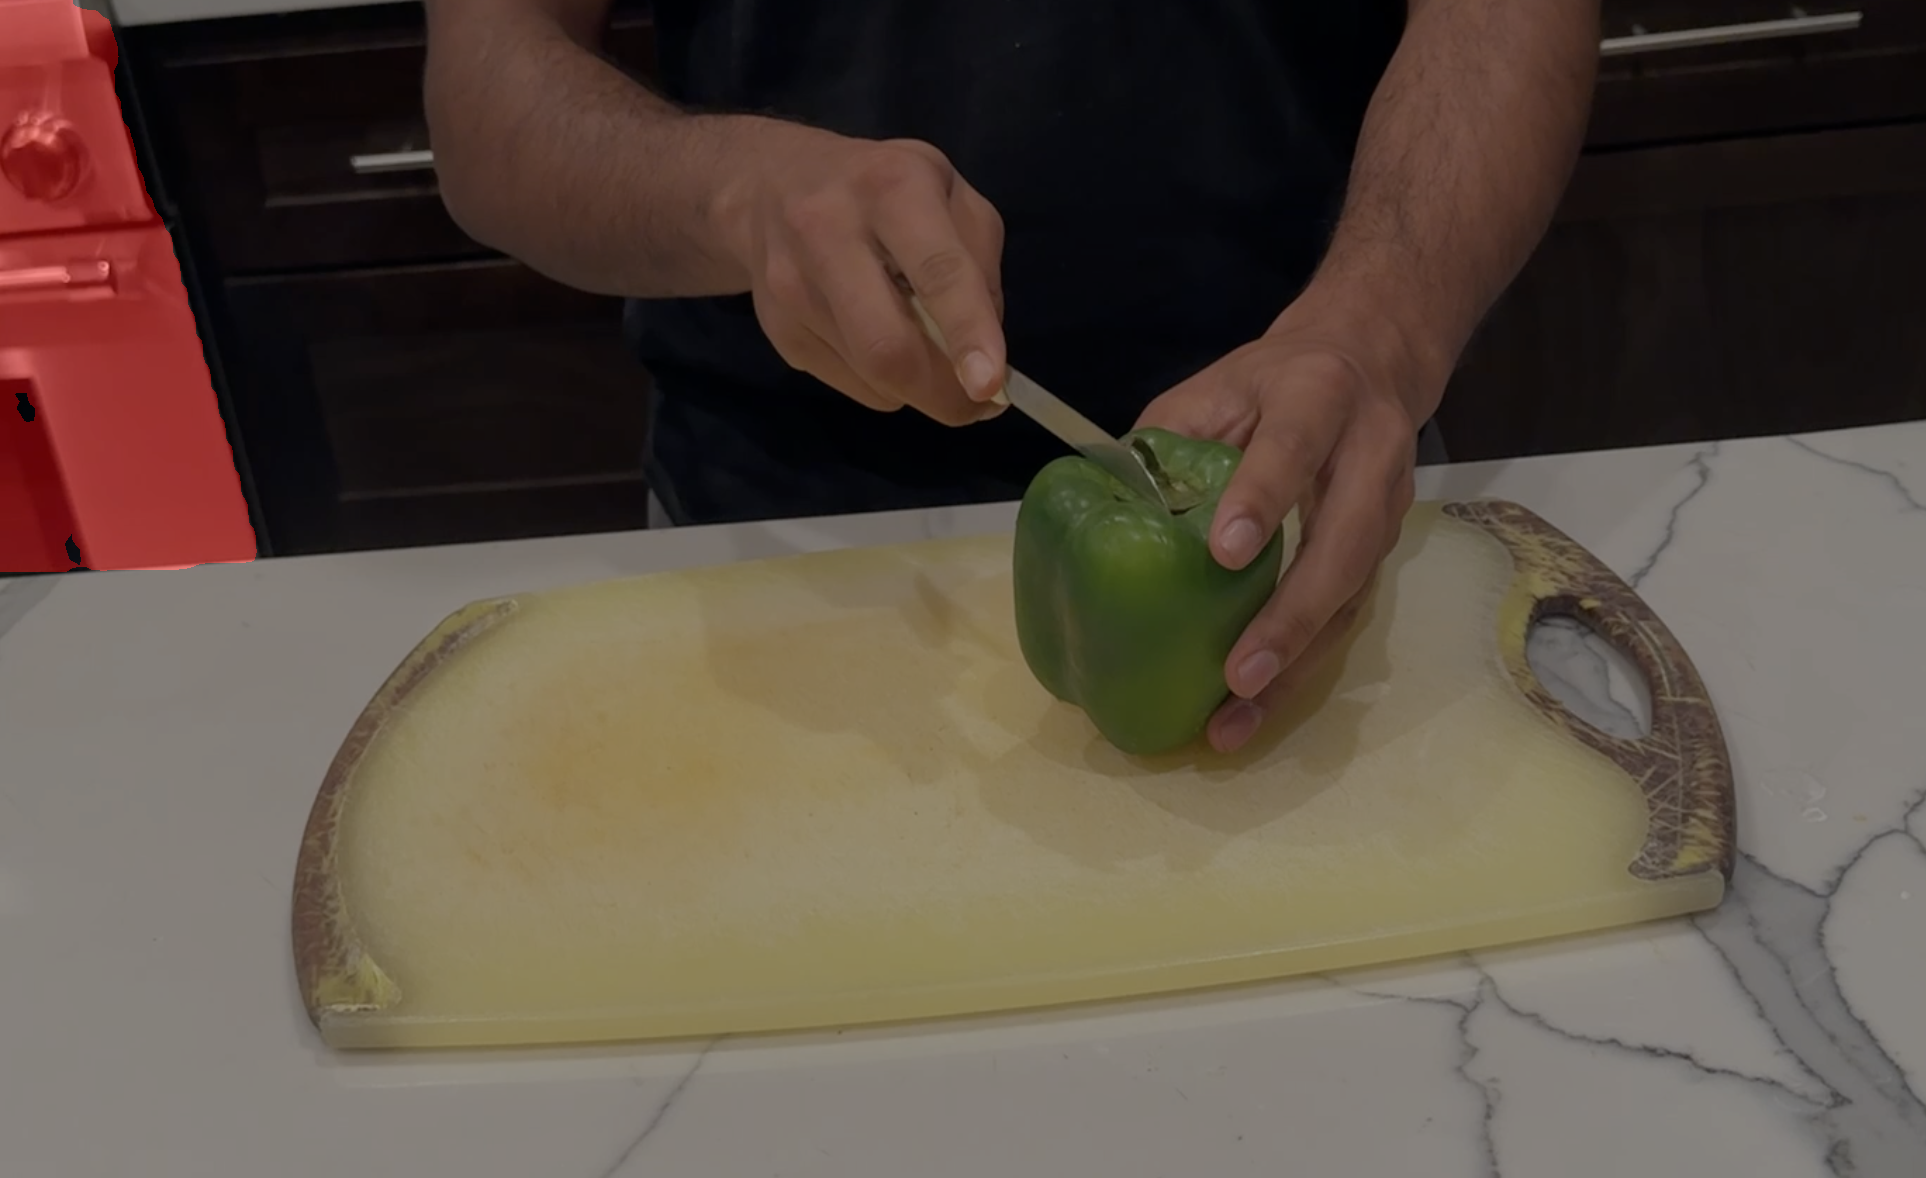

In [81]:
Image.fromarray(end_result)

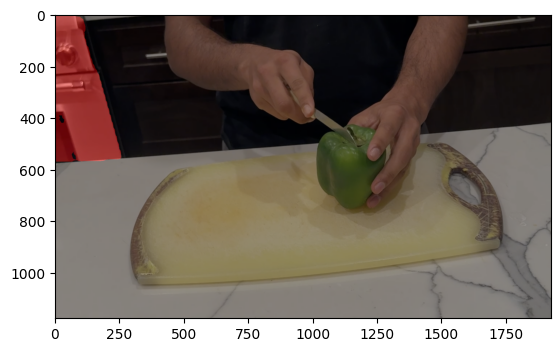

In [64]:
plt.imshow(end_result)